# Prediction of Heart Disease

Heart disease encompasses a variety of conditions that impact the heart's structure and function. Cardiovascular diseases are the leading cause of deaths globally and can also contribute to significant decreases in quality of life for survivors. Nonetheless, cardiovascular disease is treatable, primarily with diet and lifestyle interventions. Thus, being able to accurately predict the occurence of heart disease from data would help to guide whether further tests and/or treatment could be beneficial.

Here, we make a machine learning model to predict the occurence of heart disease in people based on risk factors from publically available data. The procedure we follow is
1. Perform exploratory data analysis on the data to determine what machine learning algorithms could be most succesful on the data
2. Evaluate several common machine learning models with minimal hyperparameter tuning
3. Tune the hyperparameters of one of the best performing model from step 2
4. Characterize the best performing model further

## Data Set Description

The data set is hosted by the UCI Machine Learning Repository at https://archive.ics.uci.edu/ml/datasets/Heart+Disease, and on Kaggle at https://www.kaggle.com/cherngs/heart-disease-cleveland-uci.

These are the principle investigators who contributed to the collection of this dataset:
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D. 

The target variable, Condition, is binary with 0 meaning no heart disease and 1 meaning heart disease is present.

The 13 features are
- age: age in years
- sex: 0 = female; 1 = male
- cp: chest pain type
  -- 0: typical angina
  -- 1: atypical angina
  -- 2: non-anginal pain
  -- 3: asymptomatic
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholesterol in mg/dl
- fbs: binary indicator of fasting blood sugar level
  -- 0: fasting blood sugar <= 120 mg/dl
  -- 1: fasting blood sugar > 120 mg/dl
- restecg: results of resting electrocardiograph 
  -- 0: normal
  -- 1: having ST-T wave abnormality
  -- 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach: maximum heart rate achieved
- exang: presence of exercise-induced angina
  -- 0: no exercise-induced angina
  -- 1: exercise-induced angina present
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
  -- 0: upsloping
  -- 1: flat
  -- 2: downsloping
- ca: number of major vessels (0-3) colored by fluorosopy
- thal:
  -- 0: normal
  -- 1: fixed defect
  -- 2: reversable defect
  
I had trouble finding information on how the individuals who are included in this dataset were selected. It is clear from the exploratory analysis below that the individuals are not representative of a general population. If a model were to be used in practice for deciding whether to perform more tests or other purposes, it would be important to know how the patients in the study were selected.

In [1]:
import numpy as np
np.random.seed(35702)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Load data
data = pd.read_csv(r'../input/heart-disease-cleveland-uci/heart_cleveland_upload.csv')

## 1. Exploratory Data Analysis

In [3]:
# First, we'll create a copy of the data for exploratory analysis and rename the values of the categorical features and the target to their meanings
data_explore = data.copy(deep=True)
data_explore['sex'] = data_explore['sex'].map({0: 'female', 1: 'male'})
data_explore['cp'] = data_explore['cp'].map({0: 'typical angina', 1: 'atypical angina', 2: 'non-anginal pain', 3: 'asymptomatic'})
data_explore['fbs'] = data_explore['fbs'].map({0: '<= 120 mg/dl', 1: '> 120 mg/dl'})
data_explore['restecg'] = data_explore['restecg'].map({0: 'normal', 1: 'ST-T abnormality', 2: 'Left Ventricular Hypertrophy'})
data_explore['exang'] = data_explore['exang'].map({0: 'No exercise-induced angina', 1: 'Exercise-induced angina'})
data_explore['slope'] = data_explore['slope'].map({0: 'upsloping', 1: 'flat', 2: 'downsloping'})
data_explore['thal'] = data_explore['thal'].map({0: 'normal', 1: 'fixed defect', 2: 'reversable defect'})
data_explore['condition'] = data_explore['condition'].map({0: 'no heart disease', 1: 'heart disease'})

In [4]:
data_explore.head(25)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,male,typical angina,160,234,> 120 mg/dl,Left Ventricular Hypertrophy,131,No exercise-induced angina,0.1,flat,1,normal,no heart disease
1,69,female,typical angina,140,239,<= 120 mg/dl,normal,151,No exercise-induced angina,1.8,upsloping,2,normal,no heart disease
2,66,female,typical angina,150,226,<= 120 mg/dl,normal,114,No exercise-induced angina,2.6,downsloping,0,normal,no heart disease
3,65,male,typical angina,138,282,> 120 mg/dl,Left Ventricular Hypertrophy,174,No exercise-induced angina,1.4,flat,1,normal,heart disease
4,64,male,typical angina,110,211,<= 120 mg/dl,Left Ventricular Hypertrophy,144,Exercise-induced angina,1.8,flat,0,normal,no heart disease
5,64,male,typical angina,170,227,<= 120 mg/dl,Left Ventricular Hypertrophy,155,No exercise-induced angina,0.6,flat,0,reversable defect,no heart disease
6,63,male,typical angina,145,233,> 120 mg/dl,Left Ventricular Hypertrophy,150,No exercise-induced angina,2.3,downsloping,0,fixed defect,no heart disease
7,61,male,typical angina,134,234,<= 120 mg/dl,normal,145,No exercise-induced angina,2.6,flat,2,normal,heart disease
8,60,female,typical angina,150,240,<= 120 mg/dl,normal,171,No exercise-induced angina,0.9,upsloping,0,normal,no heart disease
9,59,male,typical angina,178,270,<= 120 mg/dl,Left Ventricular Hypertrophy,145,No exercise-induced angina,4.2,downsloping,0,reversable defect,no heart disease


The people decrease in age from the first to about 22nd row. This indicates that the rows are unlikely in a random order, but their order may be indicative of how they were collected.

In [5]:
print(data_explore.shape)

(297, 14)


The data has 297 instances, 13 features and 1 target.

In [6]:
def summarize_data(data: pd.DataFrame) -> pd.DataFrame:
    """Return DataFrame summarizing data for each feature"""
    summary = data.describe(include='all').transpose()
    summary['dtype'] = data.dtypes
    summary['missing'] = data.isnull().sum()
    summary['zeros'] = (data == 0).astype(int).sum()
    summary['skewness'] = data.skew()
    return summary

In [7]:
summarize_data(data_explore)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtype,missing,zeros,skewness
age,297,NaN,NaN,NaN,54.5421,9.04974,29,48,56,61,77,int64,0,0,-0.219775
sex,297,2,male,201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0,0,NaN
cp,297,4,asymptomatic,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0,0,NaN
trestbps,297,NaN,NaN,NaN,131.694,17.7628,94,120,130,140,200,int64,0,0,0.700070
chol,297,NaN,NaN,NaN,247.35,51.9976,126,211,243,276,564,int64,0,0,1.118096
fbs,297,2,<= 120 mg/dl,254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0,0,NaN
restecg,297,3,normal,147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0,0,NaN
thalach,297,NaN,NaN,NaN,149.599,22.9416,71,133,153,166,202,int64,0,0,-0.536540
exang,297,2,No exercise-induced angina,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0,0,NaN
oldpeak,297,NaN,NaN,NaN,1.05556,1.16612,0,0,0.8,1.6,6.2,float64,0,96,1.247131


Conveinently, there are no missing values in the data. The numeric variables are on somewhat different scales, with, for example, age having a standard deviation of ~9 and oldpeak having a standard deviation of ~1.2. Categorical features (like slope) are represented as integers, but there are also some numerical features that are represented as integers (like age and chol).

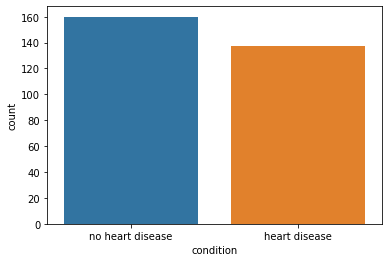

In [8]:
sns.countplot(data_explore['condition'])

The data is relatively balanced with respect to the target variable, so we won't try techniques for imbalanced clasification problems.

In [9]:
numeric_features = ['age', 'trestbps', 'chol', 'thalach']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
target = 'condition'

Text(0.5, 0.98, '')

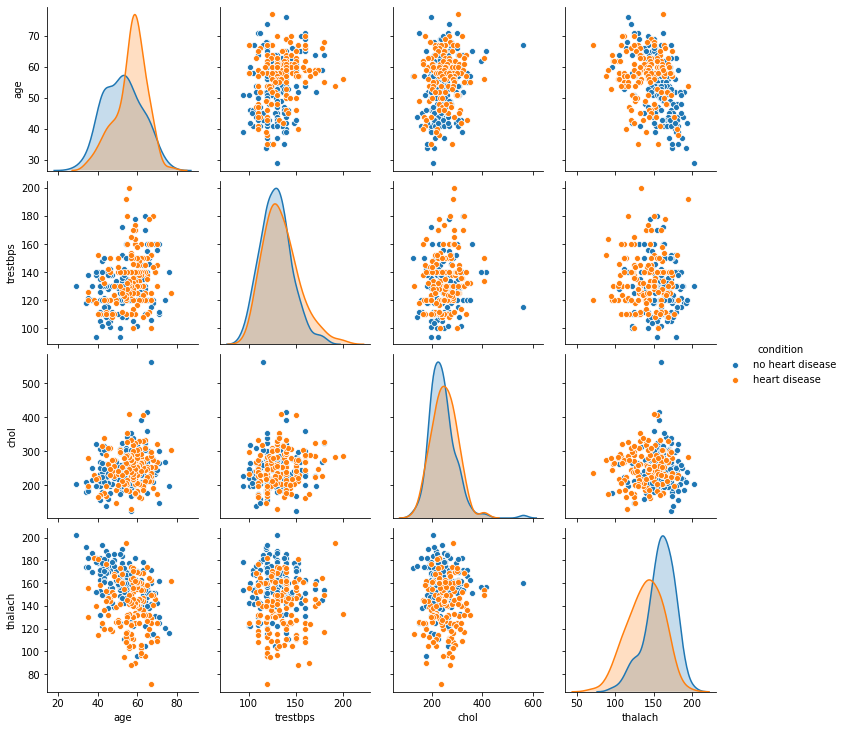

In [10]:
sns.pairplot(data_explore[numeric_features+['condition']], hue='condition')
plt.suptitle('')

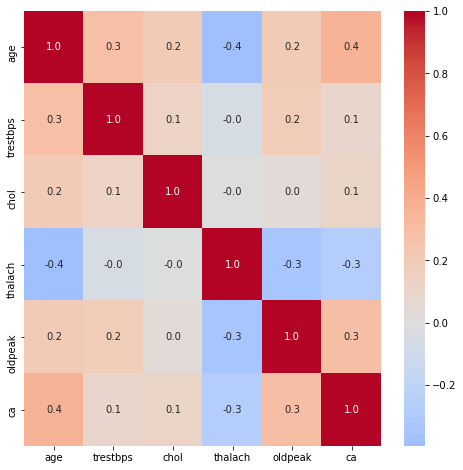

In [11]:
plt.figure(figsize=(8, 8))
sns.heatmap(data_explore.corr(), annot=True, fmt='.1f', cmap='coolwarm', center=0)

The distributions of people with respect to the different numeric features has a clear dependence on whether they have heart disease or not:
  - higher age -> heart disease more likely
  - higher blood sugar -> heart disease more likeley
  - higher cholesterol -> heart disease more likeley
  - lower maximum achieved heart rate -> heart disease more likely
  
There aren't obvious interactions between the numeric features that affect the likelihood of heart disease.


The numeric features have some moderate correlations with eachother. For example, increases in age is correlated with decreases in thalach in the data.

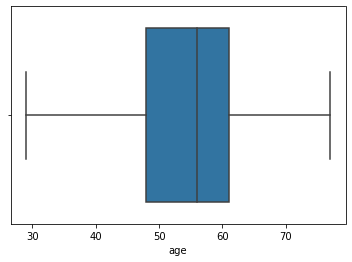

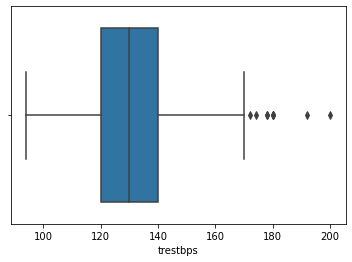

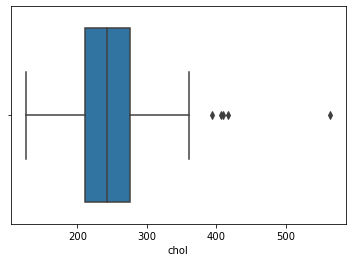

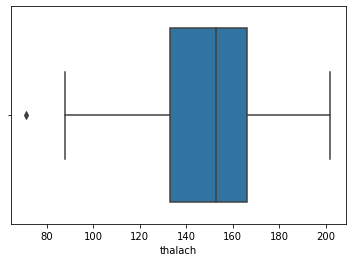

In [12]:
for feature in numeric_features:
    plt.figure()
    sns.boxplot(data_explore[feature])

The distribution of ages is far from that of the general population, with older people greatly overrepresented, particularly people around 60 years old. There's also nobody in the data younger than 29.

trestbps and thalach have some outliers in their distributions at high values. thalach has one outlier at a low value.

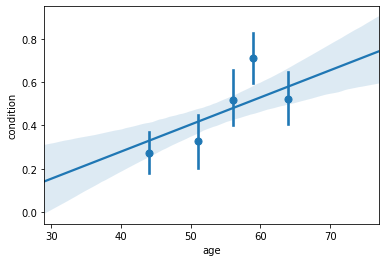

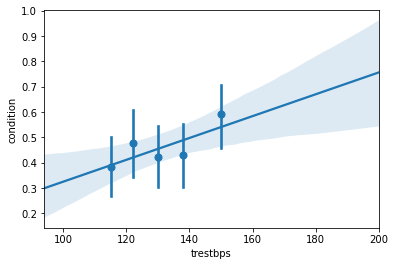

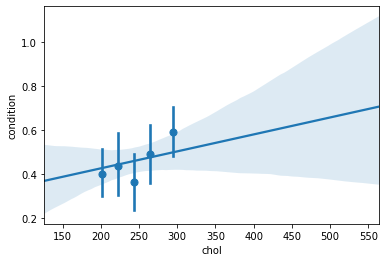

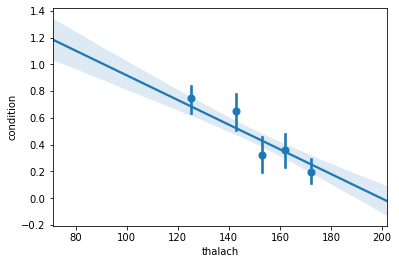

In [13]:
for feature in numeric_features:
    plt.figure()
    sns.regplot(x=feature, y=target, data=data, x_bins=5)

The relationship between the different numeric features and the percent of patients with heart disease in the data appears to be well approximated by linear functions.

Text(0.5, 0, 'Pearson Correlation with Presence of Heart Disease')

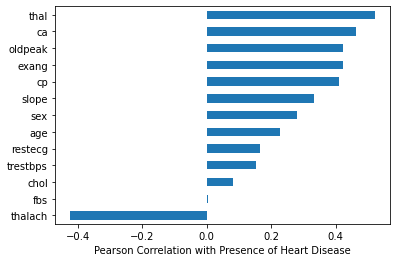

In [14]:
f = plt.figure()
data.corr(method='pearson')['condition'].sort_values(ascending=True).drop(['condition'], axis=0).plot.barh()
plt.xlabel('Pearson Correlation with Presence of Heart Disease')

Most of the variables have similar Pearson correlations with presence of heart disease. Cholesterol and fbs have the lowest magnitude of Pearson correlations with the presence of heart disease.

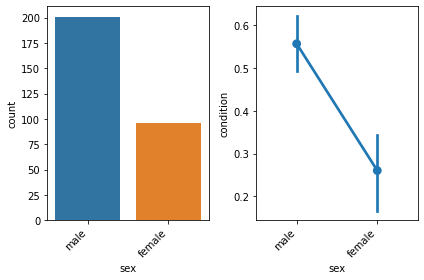

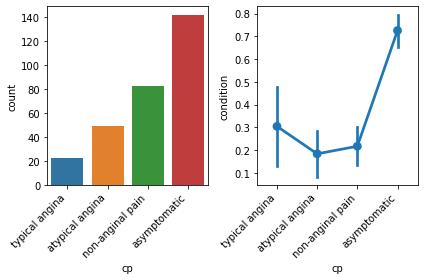

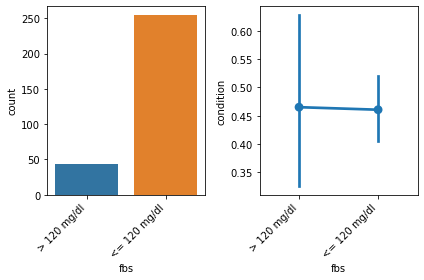

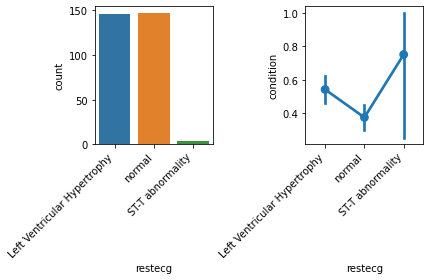

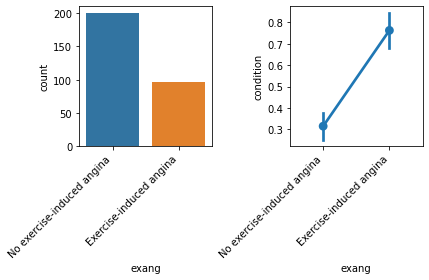

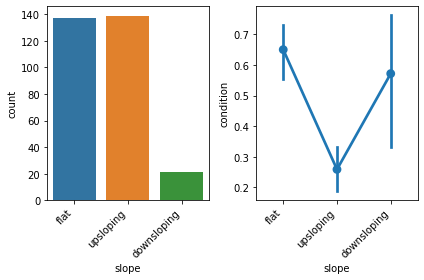

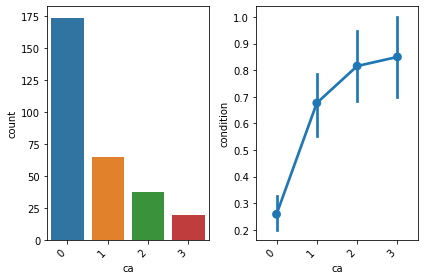

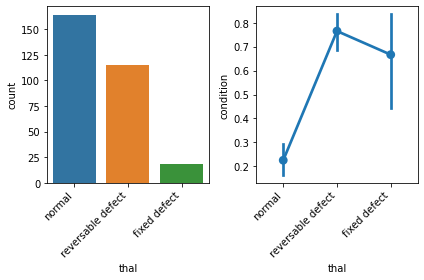

In [15]:
for feature in categorical_features:
    f, axs = plt.subplots(1, 2)
    sns.countplot(data_explore[feature], ax=axs[0])
    sns.pointplot(x=feature, y=data['condition'], data=data_explore)
    for ax in axs:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    plt.tight_layout()

There are some clear relationships between some of the categorical variables and the fraction of people who have heart disease. For instance, a higher fraction of males in the data have heart disease than females. Also, in the data, a higher fraction of people with exercise-induced angina have heart disease than those without.

Surprsingly though, having a cp (chest pain) type of 'asymptomatic' is associated with a higher fraction of people with heart disease than angina. This is not what I would expect for a general population. I would expect that, in a general population, people with angina are more likely to have heart disease than those without. I speculate that this could be due to how people were chosen to be part of this data. For instance, maybe people who came to a hospital with angina were much more likely to be included in this data set than asymptomatic people, and asymptomatic people were only included if they were otherwise very likely to have heart disease.

## 2. Evaluating Common Machine Learning Models

Now we'll evaluate several common models for this kind of data. The models we'll evaulate are
- Dummy estimator that always picks most common target value in data
- Logistic Regression
- Linear Discriminant Analysis
- Gaussian Naive Bayes
- k-Nearest Neighbors
- Decision Tree
- Extremely Randomized Trees
- LightGBM
- Artificial Neural Network

In [16]:
from typing import Dict

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

from sklearn.base import BaseEstimator
from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier

import lightgbm as lgbm

In [17]:
X, y = data.drop(['condition'], axis=1), data['condition']

In [18]:
# split off a small amount of test data for getting the expected
# performance of the chosen model in the next section.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
def evaluate_model(estimator: BaseEstimator, X: np.ndarray, y: np.ndarray, cv: int = 10) -> Dict[str, float]:
    """Print and return cross validation of model"""
    scoring = 'accuracy'
    scores = cross_validate(estimator, X, y, return_train_score=True, cv=cv, scoring=scoring)
    train_mean, train_std = scores['train_score'].mean(), scores['train_score'].std()
    print(f'Train accuracy: {train_mean} ({train_std})')
    val_mean, val_std = scores['test_score'].mean(), scores['test_score'].std()
    print(f'Validation accuracy: {val_mean} ({val_std})')
    fit_mean, fit_std = scores['fit_time'].mean(), scores['fit_time'].std()
    print(f'Fit time: {fit_mean} ({fit_std})')
    score_mean, score_std = scores['score_time'].mean(), scores['score_time'].std()
    print(f'Score time: {score_mean} ({score_std})')
    result = {
        'Train Accuracy': train_mean,
        'Train std': train_std,
        'Validation Accuracy': val_mean,
        'Validation std': val_std,
        'Fit Time (s)': fit_mean,
        'Score Time (s)': score_mean,
    }
    return result

In [20]:
# define encoding of categorical features
encoder = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), np.isin(X_train.columns.tolist(), categorical_features)), 
])

The categorical features in this data have low cardinality (4 or less), in addition at least some of them appear to be already encoded in an order that could be predictive of heart disease (such as 'cp' for chest pain type). It's not clear whether keeping the original encodings of the categorical features, one-hot encoding all categorical features or doing some combination of these would perform best. Here, we tried both keeping the original feature encodings as well as one-hot encoding all features for each type of model. We kept the version of each that performed better in the code below.

In [21]:
dummy = DummyClassifier(strategy='most_frequent')
dummy_evaluation = evaluate_model(dummy, X_train, y_train)

Train accuracy: 0.5316440700276425 (0.0015415809486421675)
Validation accuracy: 0.5315217391304347 (0.013777647349153278)
Fit time: 0.0010834455490112305 (0.0001621624625474773)
Score time: 0.00043659210205078126 (6.314436736678886e-05)


In [22]:
lr = Pipeline([
    #('encode', encoder),
    ('scale', StandardScaler()),
    ('lr', LogisticRegression())
])
lr_evaluation = evaluate_model(lr, X_train, y_train)

Train accuracy: 0.8565398622263174 (0.007316468460499898)
Validation accuracy: 0.8230072463768116 (0.08287147532154941)
Fit time: 0.010824108123779297 (0.0009421603144548269)
Score time: 0.0028978824615478516 (4.919508416976989e-05)


In [23]:
gnb = Pipeline([
    #('encode', encoder),
    ('scale', StandardScaler()),
    ('gnb', GaussianNB()),
])
gnb_evaluation = evaluate_model(gnb, X_train, y_train)

Train accuracy: 0.8570071519459436 (0.012653468392311394)
Validation accuracy: 0.8396739130434782 (0.0832712828215293)
Fit time: 0.008130645751953125 (0.0003380431963496227)
Score time: 0.003588223457336426 (0.00018126099054178706)


In [24]:
knn = Pipeline([
    ('encode', encoder),
    ('scale', StandardScaler()),
    ('knn', KNeighborsClassifier()),
])
knn_evaluation = evaluate_model(knn, X_train, y_train)

Train accuracy: 0.869674432890176 (0.013487530652690054)
Validation accuracy: 0.8268115942028986 (0.07392192330859412)
Fit time: 0.009690070152282714 (0.000994150862634651)
Score time: 0.00714261531829834 (0.0007268210154990293)


In [25]:
dt = Pipeline([
    ('encode', encoder),
    ('scale', StandardScaler()),
    ('tree', DecisionTreeClassifier(max_depth=6)),
])
dt_evaluation = evaluate_model(dt, X_train, y_train)

Train accuracy: 0.9249791584397352 (0.007933013021547499)
Validation accuracy: 0.780072463768116 (0.09425583796756719)
Fit time: 0.007652497291564942 (0.0007192983779074934)
Score time: 0.0036733388900756837 (0.00010681543225986907)


In [26]:
et = Pipeline([
    ('encode', encoder),
    ('scale', StandardScaler()),
    ('extra tree', ExtraTreesClassifier(max_depth=4))
])
et_evaluation = evaluate_model(et, X_train, y_train)

Train accuracy: 0.8907529287876793 (0.008004691621899863)
Validation accuracy: 0.835144927536232 (0.058219575819578394)
Fit time: 0.16110990047454835 (0.008271029662244442)
Score time: 0.014288330078125 (0.0014366322431905924)


In [27]:
lgb = Pipeline([
    ('encode', encoder),
    ('scale', StandardScaler()),
    ('LightGBM', lgbm.LGBMClassifier(max_depth=1)),
])

lgbm.LGBMClassifier()
lgb_evaluation = evaluate_model(lgb, X_train, y_train)

Train accuracy: 0.8560616032644465 (0.013375255469871712)
Validation accuracy: 0.8143115942028987 (0.07588504091711781)
Fit time: 0.02113051414489746 (0.006676454678902099)
Score time: 0.005542325973510742 (0.0002434350552626065)


In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier

X_encoded = encoder.fit_transform(X_train)

def create_nn_model() -> Sequential:
    """Create neural network model"""
    model = Sequential()
    #input_dim = X_encoded.shape[1]
    input_dim = X_train.shape[1]
    model.add(Dense(50, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(20, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy')
    return model

nn = Pipeline([
    #('encoder', encoder),
    ('scale', StandardScaler()),
    ('nn', KerasClassifier(build_fn=create_nn_model, epochs=300, verbose=0)),
])
nn_evaluation = evaluate_model(nn, X_train, y_train, cv=3)    # use lower cv since fit is slower

Train accuracy: 0.9725738396624473 (0.007893791955219278)
Validation accuracy: 0.8185654008438817 (0.023868583331191497)
Fit time: 2.610241969426473 (0.2593885824233545)
Score time: 0.09569454193115234 (0.022855781235303456)


In [29]:
# summarize model performances
pd.DataFrame({
    'Dummy': dummy_evaluation,
    'Logistic Regression': lr_evaluation,
    'Gaussian Naive Bayes': gnb_evaluation,
    'K-Nearest Neighbors': knn_evaluation,
    'Decision Tree': dt_evaluation,
    'Extra Trees': et_evaluation,
    'LightGBM': lgb_evaluation,
    'Neural Network': nn_evaluation,
}).transpose().sort_values('Validation Accuracy', ascending=False)

,Train Accuracy,Train std,Validation Accuracy,Validation std,Fit Time (s),Score Time (s)
Gaussian Naive Bayes,0.857007,0.012653,0.839674,0.083271,0.008131,0.003588
Extra Trees,0.890753,0.008005,0.835145,0.058220,0.161110,0.014288
K-Nearest Neighbors,0.869674,0.013488,0.826812,0.073922,0.009690,0.007143
Logistic Regression,0.856540,0.007316,0.823007,0.082871,0.010824,0.002898
Neural Network,0.972574,0.007894,0.818565,0.023869,2.610242,0.095695
LightGBM,0.856062,0.013375,0.814312,0.075885,0.021131,0.005542
Decision Tree,0.924979,0.007933,0.780072,0.094256,0.007652,0.003673
Dummy,0.531644,0.001542,0.531522,0.013778,0.001083,0.000437


## 3. Tuning Hyperparameters of Logistic Regression

Logistic regression was the best performing untuned model on some runs of this notebook (results depend on setting of random state). We'll stick with L2 regularization of Logistic Regression and just tune the regularization strength (C).

In [30]:
from sklearn.model_selection import GridSearchCV


# wide parameter range
lr = Pipeline([
    ('scale', StandardScaler()),
    ('lr', LogisticRegression()),
])

param_grid = {'lr__C': np.logspace(-3, 3, 20)}
tuned_lr = GridSearchCV(lr, return_train_score=True, param_grid=param_grid, scoring='accuracy', cv=10)
tuned_lr.fit(X_train, y_train)
results = tuned_lr.cv_results_

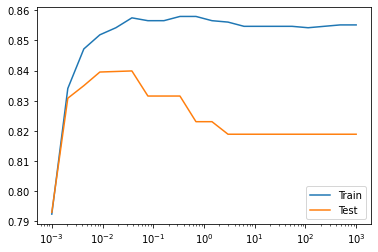

In [31]:
plt.figure()
plt.semilogx(param_grid['lr__C'], results['mean_train_score'], label='Train')
plt.semilogx(param_grid['lr__C'], results['mean_test_score'], label='Test')
plt.legend()

In [32]:
# narrower parameter range
param_grid = {'lr__C': np.logspace(-2.5, 0, 50)}
tuned_lr = GridSearchCV(lr, return_train_score=True, param_grid=param_grid, scoring='accuracy', cv=10)
tuned_lr.fit(X_train, y_train)
results = tuned_lr.cv_results_

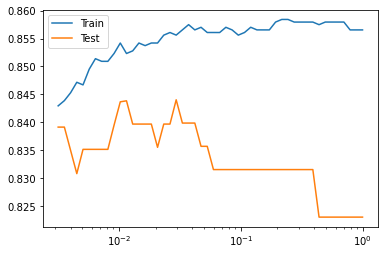

In [33]:
plt.figure()
plt.semilogx(param_grid['lr__C'], results['mean_train_score'], label='Train')
plt.semilogx(param_grid['lr__C'], results['mean_test_score'], label='Test')
plt.legend()

In [34]:
final_model = Pipeline([
    ('scale', StandardScaler()),
    ('lr', LogisticRegression(C=10**(-1.5))),
])
final_model.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('lr', LogisticRegression(C=0.03162277660168379))])

## 4. Further Characterization of Final Model

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

test_score = accuracy_score(y_test, final_model.predict(X_test))
print(f'Accuracy on Test Set of {test_score}')

Accuracy on Test Set of 0.8166666666666667


In [36]:
print(classification_report(y_test, final_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        34
           1       0.80      0.77      0.78        26

    accuracy                           0.82        60
   macro avg       0.81      0.81      0.81        60
weighted avg       0.82      0.82      0.82        60



In [37]:
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve

fpr, tpr, _ = roc_curve(y_test, final_model.predict_proba(X_test)[:, 1])

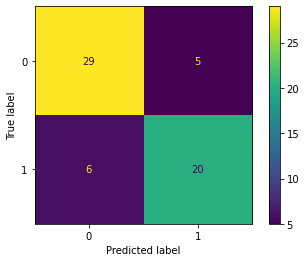

In [38]:
plot_confusion_matrix(final_model, X_test, y_test)

This model has about as many false positives as false negatives.

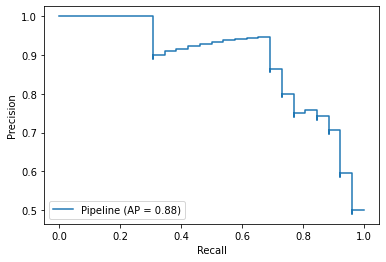

In [39]:
plot_precision_recall_curve(final_model, X_test, y_test)

In predicting people that have heart disease, it is likely more important to find the people with heart disease than to reduce false positives. This way, people who could need further tests or treatment are more likely to be identified, but at the smaller added cost of some unnecessary tests or treatment for certain people. Here, recall gives the fraction of people who have heart disease who are recognized as such from the logistic regression model. Precison gives the fraction of people who are classified as having heart disease who indeed actually have it. The default threshold of the logistic regression classifier (0.5) picks up 77 percent of people with heart disease (recall of 0.77). For this application though, it is probably better to use a threshold that classifies more people as likeley having heart disease. For instance, from the above plot, we can increase recall to around 0.9 at the expense of decreasing precision from 0.8 to about 0.72.

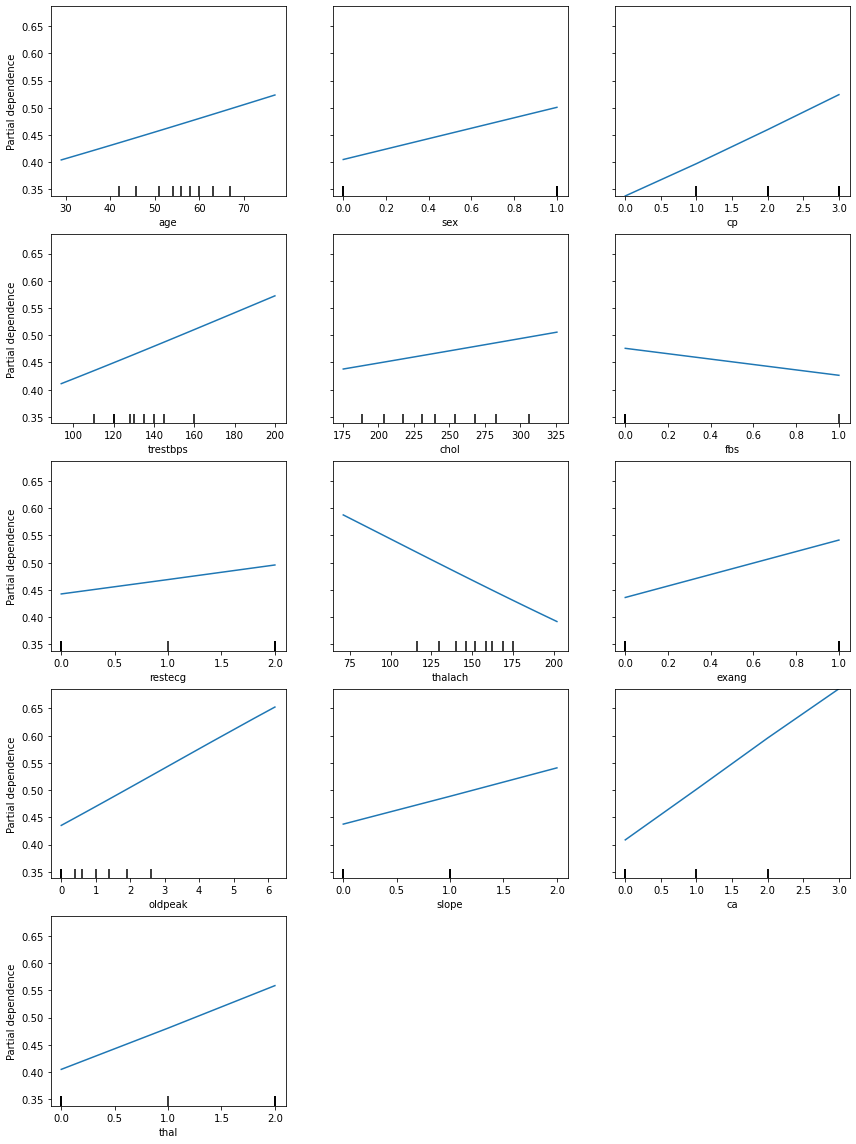

In [40]:
from sklearn.inspection import plot_partial_dependence
plt.figure(figsize=(12, 16))
plot_partial_dependence(final_model, X_train, X_train.columns, ax=plt.gca())
plt.tight_layout()

The partial dependence of the algorithm's predictions has a pretty similar range for the different features. This is not too surprising given the similar levels of correlations of the different features with people's heart disease condition.